# Neuronal Network on MNIST data
Building a native numpy-based 3-layer neural network with backpropagation. The NN will be trained on the MNIST data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from scipy import special
import random
%matplotlib inline

### 1. Data Preparation

In [4]:
# Load data
df = pd.read_csv("mnist_data.csv")
df

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Split Label and Features
y = pd.DataFrame(df["7"])
X = df.drop("7", axis=1)

# Convert data to image_data
X_list_28 = []

for i in range(0,len(X)):
    img = np.array(X.loc[i]).reshape((28,28))
    X_list_28.append(img)

len(X_list_28)

9999

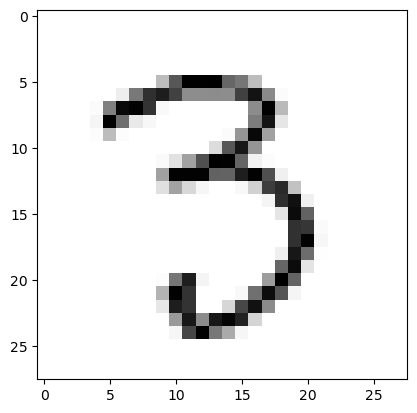

In [6]:
# Show random image of drawn number

rnd = random.randint(0,len(X_list_28))

plt.imshow(X_list_28[rnd], cmap="Greys")

In [7]:
# Scaling, Encoding and Splitting test/train

minmax = MinMaxScaler(feature_range=(0.01, 1))
X_scaled = minmax.fit_transform(X)
y_enc = pd.get_dummies(y, columns=["7"], dtype=int).values

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, random_state=42)

In [8]:
print(y_train)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


### 2. Manual Neural Network

In [10]:
# Neuron layers
input_neurons = 784
hidden_neurons = 100
output_neurons = 10

# Create weights
np.random.seed(101)
W_1 = np.random.uniform(-0.5, 0.5, (hidden_neurons,input_neurons))
W_2 = np.random.uniform(-0.5, 0.5, (output_neurons,hidden_neurons))

# Forward propagation only function for predicting
def test_neuronal_network(X, w1, w2):
    input_vector = np.array(X, ndmin=2).T
    targets = np.array(y,ndmin=2).T

    X_1 = np.dot(w1,input_vector)
    O_1 = special.expit(X_1)

    X_2 = np.dot(w2,O_1)
    O_2 = special.expit(X_2)

    return O_1, O_2

# Sample results for test dataset
O_1, O_2 = test_neuronal_network(X_train, W_1, W_2)
y_p = O_2.T
print(np.argmax(y_p[2]))
print(y_test[2])

8
[0 0 0 0 0 0 0 0 0 1]


In [11]:
# Debug array shapes

print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"W_1: {W_1.shape}")
print(f"W_2: {W_2.shape}")
print(f"O_1: {O_1.shape}")
print(f"O_2: {O_2.shape}")

X_train: (7999, 784)
y_train: (7999, 10)
W_1: (100, 784)
W_2: (10, 100)
O_1: (100, 7999)
O_2: (10, 7999)


In [12]:
# Extended neuronal network with back propagation

learning_rate = 0.001

def train_neuronal_network(X, w1, w2, y, alpha):

    input_vector = np.array(X, ndmin=2).T
    targets = np.array(y,ndmin=2).T
    
    X_1 = np.dot(w1,input_vector)
    O_1 = special.expit(X_1)

    X_2 = np.dot(w2,O_1)
    O_2 = special.expit(X_2)

    error_output = targets - O_2
    error_hidden = np.dot(w2.T, error_output)

    a_1 = np.dot((error_hidden * O_1*(1-O_1)),np.transpose(input_vector))
    a_2 = np.dot((error_output * O_2*(1-O_2)),np.transpose(O_1))

    w1 = w1 + alpha * a_1
    w2 = w2 + alpha * a_2
    return w1, w2 #, a_1, a_2

w_1_new, w_2_new = train_neuronal_network(X_train, W_1, W_2, y_train, learning_rate)

print(f" W_2: {W_2[0]}")
print(f" W_2_new: {w_2_new[0]}")

 W_2: [ 0.0631878  -0.30608767 -0.05607409  0.04663714  0.29404786  0.31831352
  0.08415809 -0.22624681 -0.21119467 -0.23974622  0.41516954 -0.21279296
 -0.47478029  0.26238683 -0.17692935  0.20089739  0.04068487 -0.11743653
 -0.05781565 -0.26893014  0.42472169  0.05471904 -0.47778086 -0.301544
 -0.2958578  -0.34190812  0.18355289  0.37878451 -0.48714705  0.35209904
  0.2802097  -0.45515852  0.18810471  0.10114125 -0.26121952  0.43810912
  0.24870621 -0.14818638 -0.37441721  0.12621075  0.20440965  0.23595767
 -0.45918378  0.0193934   0.20489003  0.45241721  0.46659446 -0.41084776
  0.42236797 -0.42485285  0.2520123   0.40135714  0.32252371 -0.31298806
 -0.46405623  0.15131975  0.38012145  0.4330226  -0.45580324 -0.32087432
 -0.39731036 -0.42815988  0.25649415  0.48870677 -0.24575042  0.33546106
 -0.16021197 -0.35875571  0.12777911  0.33251683  0.08938894 -0.33080319
 -0.20748956 -0.18159684 -0.13288292  0.06105709 -0.06487701  0.27845036
 -0.21610899 -0.41520747 -0.24058193 -0.0841125

In [13]:
# Train 1000 additional epochs

for i in range(1000):
    w_1_new, w_2_new = train_neuronal_network(X_train, w_1_new, w_2_new, y_train, learning_rate)
    if i == 999:
        print("Training over!")

Training over!


### NN Predictions

In [15]:
# Test Neuronal Network after Training
index= 950

O_1, O_2 = test_neuronal_network(X_test, w_1_new, w_2_new)
y_predict = O_2.T
print(np.argmax(y_predict[index]))
print(np.argmax(y_test[index]))
print(y_predict[index])

2
2
[1.35979806e-02 7.14408643e-04 9.92258514e-01 3.68860311e-04
 1.07825822e-03 2.75406102e-02 5.09041779e-04 3.52283811e-03
 2.25743434e-04 9.93074283e-06]


In [27]:
# Performance Calculation

def performance_neuronal_network(y_test, y_predict):
    correct = []
    for i in range(0, len(y_test)):
        if np.argmax(y_predict[i]) == np.argmax(y_test[i]):
            correct.append(i)
    performance = len(correct)/len(y_test)
    return performance, correct

perf, perf_list = performance_neuronal_network(y_test, y_predict)

print(f"Performance: {perf*100}%")

Performance: 90.05%


# Optimizations

In [47]:
# Performance for different learning_rates and epochs
import timeit

learning_rates = [0.01,0.001,0.0001,0.00001]#,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
epochs = [1,10,100,1000,10000]
df_performance = pd.DataFrame(index=epochs, columns=learning_rates)
df_runtime = pd.DataFrame(index=epochs, columns=learning_rates)

for i in range(0, len(learning_rates)): 
    for j in range(0, len(epochs)):
        
        # reset weights for each training
        w1_run = W_1 
        w2_run = W_2
        
        # runtime start
        start = timeit.default_timer()
        
        # run epochs
        for k in range(epochs[j]):
            w1_run, w2_run = train_neuronal_network(X_train, w1_run, w2_run, y_train, learning_rates[i])
            if k == epochs[j]-1:
                print(f"Training over! Learning rate:{learning_rates[i]} - Epochs:{epochs[j]}")

        # runtime stop
        stop = timeit.default_timer()
        df_runtime.loc[epochs[j],learning_rates[i]] = stop - start

        # calculate y_predict
        O_1, O_2 = test_neuronal_network(X_test, w1_run, w2_run)
        y_predict = O_2.T

        # calculate performance
        perf, perf_list = performance_neuronal_network(y_test, y_predict)
        df_performance.loc[epochs[j],learning_rates[i]] = perf

print("Training Completed!")

Training over! Learning rate:0.01 - Epochs:1
Training over! Learning rate:0.01 - Epochs:10
Training over! Learning rate:0.01 - Epochs:100
Training over! Learning rate:0.01 - Epochs:1000
Training over! Learning rate:0.01 - Epochs:10000
Training over! Learning rate:0.001 - Epochs:1
Training over! Learning rate:0.001 - Epochs:10
Training over! Learning rate:0.001 - Epochs:100
Training over! Learning rate:0.001 - Epochs:1000
Training over! Learning rate:0.001 - Epochs:10000
Training over! Learning rate:0.0001 - Epochs:1
Training over! Learning rate:0.0001 - Epochs:10
Training over! Learning rate:0.0001 - Epochs:100
Training over! Learning rate:0.0001 - Epochs:1000
Training over! Learning rate:0.0001 - Epochs:10000
Training over! Learning rate:1e-05 - Epochs:1
Training over! Learning rate:1e-05 - Epochs:10
Training over! Learning rate:1e-05 - Epochs:100
Training over! Learning rate:1e-05 - Epochs:1000
Training over! Learning rate:1e-05 - Epochs:10000
Training Completed!


In [49]:
df_performance

,0.01000,0.00100,0.00010,0.00001
1,0.1005,0.1005,0.127,0.1125
10,0.1005,0.1005,0.482,0.09
100,0.1005,0.4065,0.8465,0.507
1000,0.1005,0.9095,0.93,0.8455
10000,0.1005,0.917,0.952,0.929


In [77]:
performance = df_performance.to_numpy(dtype=float)
performance

array([[0.1005, 0.1005, 0.127 , 0.1125],
       [0.1005, 0.1005, 0.482 , 0.09  ],
       [0.1005, 0.4065, 0.8465, 0.507 ],
       [0.1005, 0.9095, 0.93  , 0.8455],
       [0.1005, 0.917 , 0.952 , 0.929 ]])

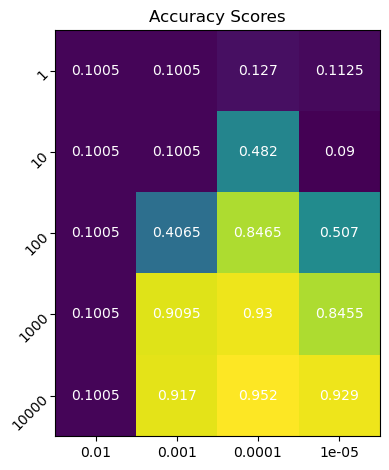

In [101]:
# Heatmap


fig, ax = plt.subplots()
im = ax.imshow(performance, cmap="viridis")

ax.set_yticks(range(len(epochs)), labels=epochs,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_xticks(range(len(learning_rates)), labels=learning_rates)

# Loop over data dimensions and create text annotations.
for i in range(len(epochs)):
    for j in range(len(learning_rates)):
        text = ax.text(j, i, performance[i, j],
                       ha="center", va="center",color="white")

ax.set_title("Accuracy Scores")
fig.tight_layout()
plt.show()

In [51]:
df_runtime

,0.01000,0.00100,0.00010,0.00001
1,0.120073,0.094594,0.116377,0.067982
10,0.935334,1.075678,0.857814,0.928055
100,9.693255,10.367294,10.392081,9.328074
1000,97.255033,109.005248,98.950982,98.216252
10000,1039.199978,1059.635039,986.380365,976.468619
